In [1]:
# loading necessary libraryes

import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate
import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator

In [2]:
% matplotlib notebook

def plot_style(xticks=5,yticks=5):

    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6

In [14]:
MSun = 1.98892e33                                                # solar mass (g)
_star_model = np.loadtxt("datafiles/BSK21_1.40.dat", skiprows=1)

_rho = interpolate.interp1d(np.log(_star_model[:, 1] * 1e5), np.log(_star_model[:, 3]), kind='linear')
_pressure = interpolate.interp1d(np.log(_star_model[:, 1] * 1e5), np.log(_star_model[:, 2]), kind='linear')
_radii = interpolate.interp1d(np.log(_star_model[:, 3]), np.log(_star_model[:, 1] * 1e5), kind='linear')
_mass = interpolate.interp1d(np.log(_star_model[:, 1] * 1e5), np.log(_star_model[:, 0] * MSun), kind='linear')
_Phi = interpolate.interp1d(np.log(_star_model[:, 1] * 1e5), _star_model[:, 4], kind='linear')
_nb = interpolate.interp1d(np.log(_star_model[:, 3]), _star_model[:, 5], kind='linear')
_ne = interpolate.interp1d(np.log(_star_model[:, 3]), _star_model[:, 6], kind='linear')
_nm = interpolate.interp1d(np.log(_star_model[:, 3]), _star_model[:, 7], kind='linear')

def Phi(a):  # dimensionless gravitational potential(radius)
    return _Phi(np.log(a))

def rho(a):  # density(radius)
    return np.exp(_rho(np.log(a)))

def pressure(a):  # Pressure(radius)
    return np.exp(_pressure(np.log(a)))

def radii(a):  # radius(density)
    return np.exp(_radii(np.log(a)))


def mass(a):  # mass(radius)
    return np.exp(_mass(np.log(a)))

In [352]:
for i in range(0,8): # processing data from 3d code, loop over eight procs
    if i==0:
        data_3d = np.loadtxt('output/solution-000.000'+str(i)+'.dat')
    else:
        data_3d_add = np.loadtxt('output/solution-000.000'+str(i)+'.dat')
        data_3d = np.vstack([data_3d,data_3d_add])
        
check = (1*data_3d[:,0]+2*data_3d[:,1]+3*data_3d[:,2])
ckech_uniq, indice = np.unique(check, return_index=True)

print(np.shape(data_3d))
print(np.shape(indices))

data_3d_uniq = np.vstack([data_3d[indice,0],data_3d[indice,1],data_3d[indice,2]]).T
T_uniq = data_3d[indice,3]
print(np.shape(data_3d_uniq))

r_coord = np.sqrt(data_3d[indice,0]**2+data_3d[indice,1]**2+data_3d[indice,2]**2)
phi_coord = np.arctan(data_3d[indice,1]/(1e-16+data_3d[indice,0]))
theta_coord = np.arccos(data_3d[indice,2]/(1e-16+r_coord))

data_3d_uniq_sph = np.vstack([r_coord,phi_coord,theta_coord]).T
                             
print(np.shape(data_3d_uniq_sph))                    

(22260, 4)
(16,)
(13861, 3)
(13861, 3)


In [353]:
# getting vertices with coordinates (r,phi=pi/4,theta=pi/4)

inner_r = 5000            
outer_r = 1251100
inner_rho = rho(inner_r)
outer_rho = rho(outer_r)

rho_mesh = np.logspace(np.log10(inner_rho),np.log10(outer_rho),16)
r_mesh = radii(rho_mesh)

r = np.sqrt(data_3d_uniq[:,0]**2 + data_3d_uniq[:,1]**2 + data_3d_uniq[:,2]**2)
print(np.shape(r_uniq))

indices = np.zeros(16)
mesh_cart = np.zeros((3,16))

for i in range(0,16):
    minimizer =  np.abs((data_3d_uniq[:,0]-data_3d_uniq[:,1])) + \
                 np.abs((data_3d_uniq[:,1]-data_3d_uniq[:,2])) + \
                 np.abs((data_3d_uniq[:,2]-data_3d_uniq[:,0])) + \
                 np.abs(r-r_mesh[i])

    a = np.argmin(minimizer)
    indices[i] = a
    mesh_cart[0,i],mesh_cart[1,i],mesh_cart[2,i] = \
    data_3d_uniq[a,0],data_3d_uniq[a,1],data_3d_uniq[a,2]
    print(mesh_cart[0,i],mesh_cart[1,i],mesh_cart[2,i])
    
indices = indices.astype(int)
print(indices)

# getting vertices with coordinates (log10(rho)=11.5,phi,theta)
rho_ref = 11.2
heater_idx = np.zeros(10)
rho_coord = rho(r_coord)

heater_idx  =  np.where(np.power((np.log10(rho_coord)-rho_ref),2)<0.00001)
r_heater = r_coord[heater_idx]
rho_heater = rho(r_heater)

heater_idx_2  =  np.where(np.power(theta_coord[heater_idx]-np.pi/4,2)<0.001)
heater_idx_3  =  np.where(np.power(phi_coord[heater_idx]-np.pi/4,2)<0.001)


# getting vertex with coordinates (r=R,phi=0,theta=0)
minimizer =  np.abs(data_3d_uniq[:,1]-0) + \
             np.abs(data_3d_uniq[:,2]-0) + \
             np.abs(r-r_mesh[-1])         
arg_surf_no_heater = np.argmin(minimizer)
arg_surf_heater = indices[-1]

(170,)
2861.46 2861.46 2936.68
599532.0 599532.0 615368.0
661046.0 661046.0 678509.0
669260.0 669260.0 686938.0
675400.0 675400.0 693238.0
681099.0 681099.0 699082.0
685680.0 685680.0 703781.0
688955.0 688955.0 707135.0
691298.0 691298.0 709533.0
698987.0 698987.0 717420.0
703326.0 703326.0 721866.0
707038.0 707038.0 725669.0
710074.0 710074.0 728775.0
712513.0 712513.0 731269.0
714456.0 714456.0 733250.0
715994.0 715994.0 734817.0
[  624  6854  9526  9907 10187 10452 10666 10823 10931 11310 11535 11723
 11875 11995 12087 12173]


(33,)
(32,)


<IPython.core.display.Javascript object>


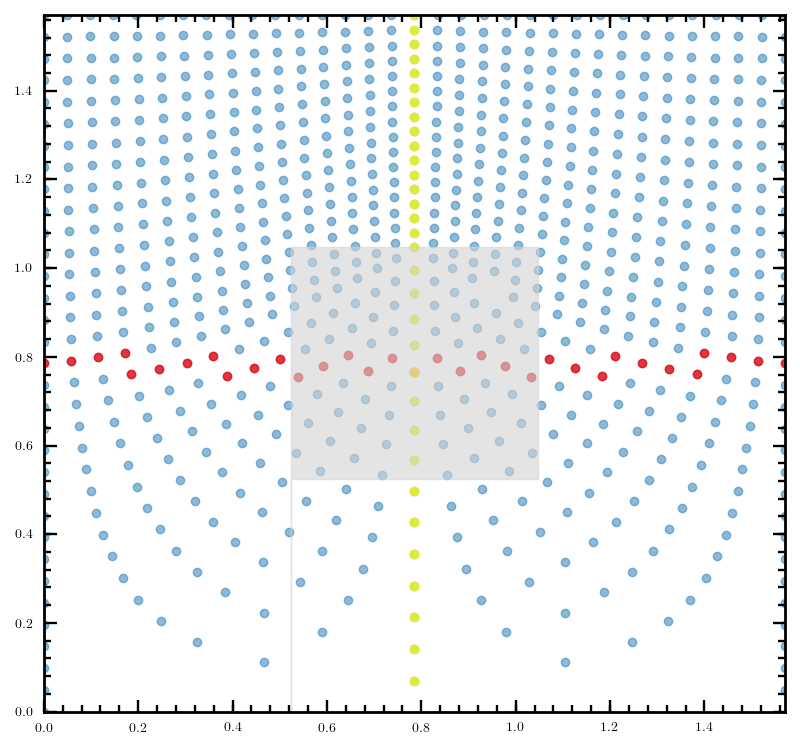

In [354]:
phi_theta, theta_theta = phi_coord[heater_idx][heater_idx_2],theta_coord[heater_idx][heater_idx_2]
phi_phi, theta_phi = phi_coord[heater_idx][heater_idx_3],theta_coord[heater_idx][heater_idx_3]

print(np.shape(phi_theta))
print(np.shape(phi_phi))
      
plot_style()
plt.scatter(phi_coord[heater_idx],theta_coord[heater_idx],alpha=0.5)
plt.scatter(phi_theta,theta_theta,color='red',alpha=0.7)
plt.scatter(phi_phi,theta_phi,color='yellow',alpha=0.7)
plt.plot()
plt.xlim(0,np.pi/2)
plt.ylim(0,np.pi/2)
x = np.array([np.pi/6,np.pi/6,np.pi/3,np.pi/3,np.pi/6])
y = np.array([np.pi/6,np.pi/3,np.pi/3,np.pi/6,np.pi/6])
plt.fill_between(x,y,color='lightgray',alpha=0.6)
plt.show()

<IPython.core.display.Javascript object>


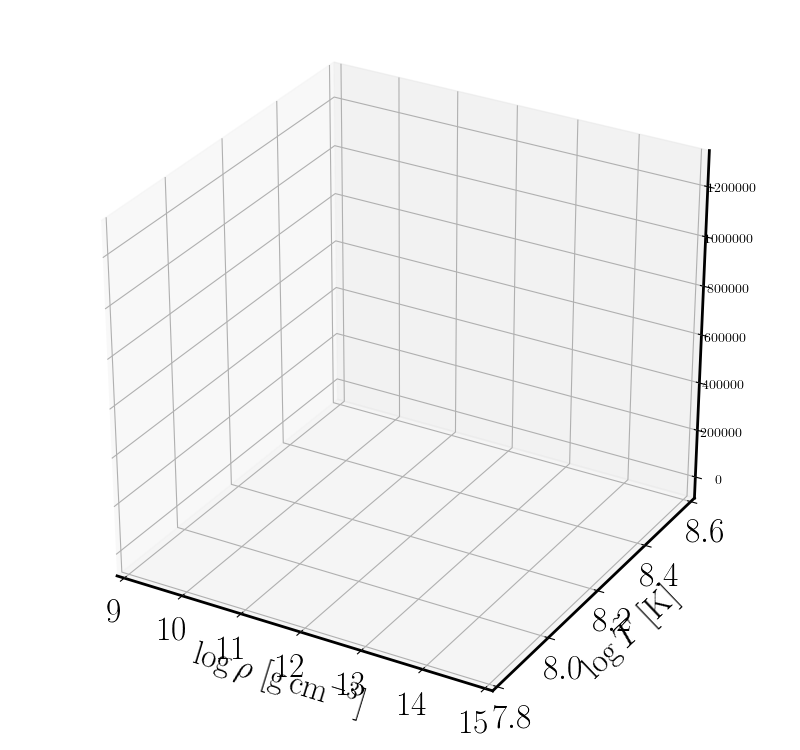

In [355]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(data_3d_uniq[:,0],data_3d_uniq[:,1],data_3d_uniq[:,2],marker='.',color='blue',alpha=0.1)
ax1.scatter(data_3d_uniq[:,0][indices],data_3d_uniq[:,1][indices],data_3d_uniq[:,2][indices],marker='^',color='red',alpha=1)

In [356]:
r = np.sqrt(data_3d_uniq[:,0][indices]**2+data_3d_uniq[:,1][indices]**2+data_3d_uniq[:,2][indices]**2)

yrtosec = 3.154e+7
times = np.array([0.001,0.1,1,10,100,2500,1e5])
time_idx = np.zeros_like(times)
time = np.loadtxt('cooling_curve.dat',skiprows=1)[:,0]
print(np.shape(time))
for i in range(len(time_idx)):
    time_idx[i] = np.argmin(np.abs(time-times[i]))

time_idx = time_idx.astype(int)
print(time_idx)
print(r)

(126,)
[ 14  26  32  38  44  63 124]
[    4999.99960856  1047642.59815645  1155135.52941332  1169487.79858706
  1180215.76190288  1190171.13825113  1198174.36993161  1203892.80763488
  1207982.99975496  1221416.02606892  1228993.67228151  1235476.00723324
  1240775.23007876  1245031.68662448  1248419.12608386  1251099.85195467]


In [361]:
T_uniq_no = np.zeros_like(time)
T_uniq_he = np.zeros_like(time)

for j in range(10,len(time)):
    yy = np.array([7.8,8,8.2,8.4,8.6])
    xx = np.array([9,10,11,12,13,14,15])

    plt.ylabel('$\\rm log \\thinspace $$\\tilde{T} \\thinspace  \\thinspace \\rm [K]$',fontsize=24)
    plt.xlabel('$\\rm log \\thinspace $$\\rho \\thinspace \\thinspace  \\rm [g \\thinspace cm^{-3}]$',fontsize=24)

    plt.yticks(yy, fontsize=24)
    plt.xticks(xx, fontsize=24)

    plt.xlim(9,15)
    plt.ylim(7.8,8.6)
    for i in range(0,8): # processing data from 3d code, loop over eight procs
        if i==0:
            if(j>99):
                data_3d = np.loadtxt('output/solution-' + str(j) +'.000'+str(i)+'.dat')
            else:
                data_3d = np.loadtxt('output/solution-0' + str(j) +'.000'+str(i)+'.dat')
        else:
            if(j>99):
                data_3d_add = np.loadtxt('output/solution-' + str(j) +'.000'+str(i)+'.dat')
            else:
                data_3d_add = np.loadtxt('output/solution-0' + str(j) +'.000'+str(i)+'.dat')
            data_3d = np.vstack([data_3d,data_3d_add])

    check = (1*data_3d[:,0]+2*data_3d[:,1]+3*data_3d[:,2])
    ckech_uniq, indice = np.unique(check, return_index=True)
    T_uniq_no[j] = data_3d[:,3][indice][arg_surf_no_heater]
    T_uniq_he[j] = data_3d[:,3][indice][arg_surf_heater]

<IPython.core.display.Javascript object>


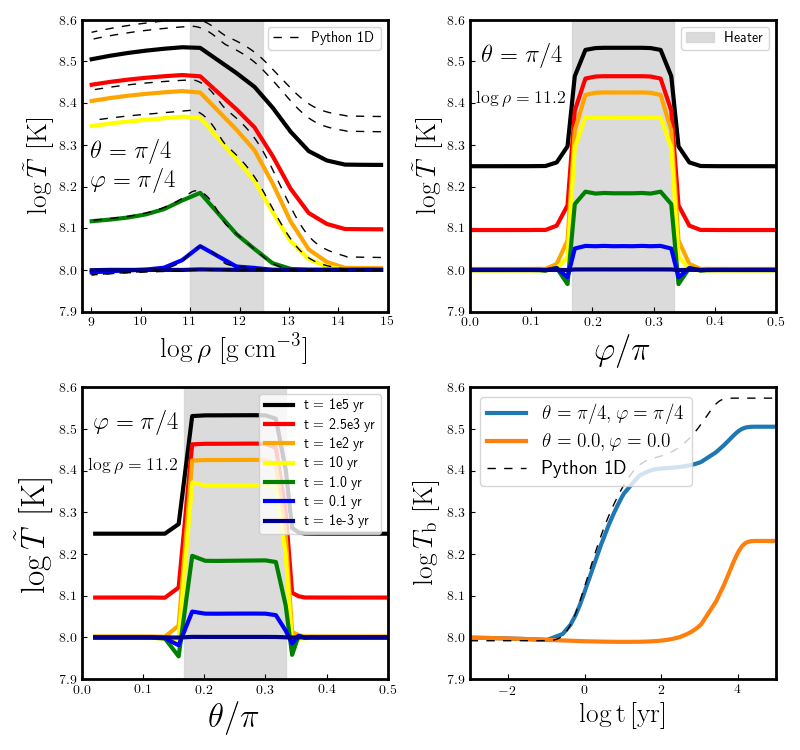

124
63
44
38
32
26
14


/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log10


In [367]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

yy = np.array([7.8,8,8.2,8.4,8.6])
xx = np.array([9,10,11,12,13,14,15])

ax1.set_ylabel('$\\rm log \\thinspace $$\\tilde{T} \\thinspace  \\thinspace \\rm [K]$',fontsize=20)
ax2.set_ylabel('$\\rm log \\thinspace $$\\tilde{T} \\thinspace  \\thinspace \\rm [K]$',fontsize=20)
ax1.set_ylim(7.9,8.6)

ax1.fill_between(np.log10([1e11-1e-11,1e11,3e12,3e12+1e-11]),[7.5,9,9,7.5],color='lightgray',alpha=0.8)
ax2.fill_between([1/6-1e-11,1/6,1/3,1/3+1e-11],[7.5,9,9,7.5],color='lightgray',alpha=0.8,label='Heater')
ax3.fill_between([1/6-1e-11,1/6,1/3,1/3+1e-11],[7.5,9,9,7.5],color='lightgray',alpha=0.8)

ax1.text(9,8.27,'$\\theta = \\pi/4$',fontsize=18)
ax1.text(9,8.2,'$\\varphi = \\pi/4$',fontsize=18)
ax2.text(0.02,8.5,'$\\theta = \\pi/4$',fontsize=18)
ax2.text(0.01,8.4,'$\\log\\rho = 11.2 $',fontsize=13)
ax3.text(0.02,8.5,'$\\varphi = \\pi/4$',fontsize=18)
ax3.text(0.01,8.4,'$\\log \\rho = 11.2 $',fontsize=13)
ax3.set_ylabel('$\\rm log \\thinspace $$\\tilde{T} \\thinspace  \\thinspace \\rm [K]$',fontsize=24)
ax3.set_ylim(7.9,8.6)
ax1.set_xlabel('$\\rm log \\thinspace $$\\rho \\thinspace \\thinspace  \\rm [g \\thinspace cm^{-3}]$',fontsize=20)
ax2.set_ylim(7.9,8.6)
ax2.set_xlim(0,0.5)
ax3.set_xlim(0,0.5)

ax1.set_xlabel('$\\rm log \\thinspace $$\\rho \\thinspace \\thinspace  \\rm [g \\thinspace cm^{-3}]$',fontsize=20)
ax2.set_xlabel('$\\rm \\varphi/ \\pi$',fontsize=24)
ax3.set_xlabel('$\\rm \\theta / \\pi$',fontsize=24)

for j,col,lb in zip(range(len(times)-1,-1,-1),np.array(['darkblue','blue','green','yellow','orange','red','black'])[::-1],
                np.array(['t = 1e5 yr','t = 2.5e3 yr', 't = 1e2 yr','t = 10 yr', 't = 1.0 yr','t = 0.1 yr', 't = 1e-3 yr'])):
    print(time_idx[j])
    for i in range(0,8): # processing data from 3d code, loop over eight procs
        if i==0:
            if(j<len(times)-1):
                data_3d = np.loadtxt('output/solution-0' + str(time_idx[j]) +'.000'+str(i)+'.dat')
            else:
                data_3d = np.loadtxt('output/solution-' + str(time_idx[j]) +'.000'+str(i)+'.dat')
        else:
            if(j<len(times)-1):
                data_3d_add = np.loadtxt('output/solution-0' + str(time_idx[j]) +'.000'+str(i)+'.dat')
            else:
                data_3d_add = np.loadtxt('output/solution-' + str(time_idx[j]) +'.000'+str(i)+'.dat')
            data_3d = np.vstack([data_3d,data_3d_add])

    check = (1*data_3d[:,0]+2*data_3d[:,1]+3*data_3d[:,2])
    ckech_uniq, indice = np.unique(check, return_index=True)
    T_uniq_r = data_3d[:,3][indice][indices]
    T_uniq_theta = data_3d[:,3][indice][heater_idx][heater_idx_2]
    T_uniq_phi = data_3d[:,3][indice][heater_idx][heater_idx_3]

    ax1.plot(np.log10(rho(r)),np.log10(T_uniq_r),lw=3,color=col)
    ax2.plot(phi_theta[np.argsort(phi_theta)]/np.pi,np.log10(T_uniq_theta[np.argsort(phi_theta)]),lw=3,color=col)
    ax3.plot(theta_phi[np.argsort(theta_phi)]/np.pi,np.log10(T_uniq_phi[np.argsort(theta_phi)]),lw=3,color=col,label=lb)
    
    

data_1d_2 = np.loadtxt('file_0_cooling.dat')
ax4.plot(np.log10(time[10:]),np.log10(T_uniq_he[10:]),lw=3,label='$\\theta = \\pi/4, \\varphi = \\pi/4$')
ax4.plot(np.log10(time[10:]),np.log10(T_uniq_no[10:]),lw=3,label='$\\theta = 0.0, \\varphi = 0.0$') 

ax4.plot(np.log10(data_1d_2[:,1]-1e3) ,np.log10(data_1d_2[:,2]/1.21) ,'--',color='black', label='Python 1D')
ax4.set_ylabel('$\\rm log \\thinspace $$T_{\\rm b} \\thinspace  \\thinspace \\rm [K]$',fontsize=20)
ax4.set_xlabel('$\\rm log \\thinspace t \\thinspace [yr]$',fontsize=20)
ax4.set_xlim(-3,5)
ax4.set_ylim(7.9,8.6)
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper left',fontsize=14)

data_1d_3 = np.loadtxt('file_0.dat')

for i in [1,2,3,5,7,9,11]:
    ax1.plot(np.log10(data_1d_3[:,0]),np.log10(data_1d_3[:,i]),'--',color='k')
    
ax1.plot([1,1],[1,1],'--',color='k',label='Python 1D')
ax1.legend(loc='upper right')
ax1.set_xlim(8.8,15)
plt.savefig('heater_in_3d.pdf',format='pdf')

In [307]:
plot_style()
for j in range(10,99):
    yy = np.array([7.8,8,8.2,8.4,8.6])
    xx = np.array([9,10,11,12,13,14,15])

    plt.ylabel('$\\rm log \\thinspace $$\\tilde{T} \\thinspace  \\thinspace \\rm [K]$',fontsize=24)
    plt.xlabel('$\\rm log \\thinspace $$\\rho \\thinspace \\thinspace  \\rm [g \\thinspace cm^{-3}]$',fontsize=24)

    plt.yticks(yy, fontsize=24)
    plt.xticks(xx, fontsize=24)

    plt.xlim(9,15)
    plt.ylim(7.8,8.6)
    print(j)
    for i in range(0,8): # processing data from 3d code, loop over eight procs
        if i==0:
            data_3d = np.loadtxt('output/solution-0' + str(j) +'.000'+str(i)+'.dat')
        else:
            data_3d_add = np.loadtxt('output/solution-0' + str(j) +'.000'+str(i)+'.dat')
            data_3d = np.vstack([data_3d,data_3d_add])

    check = (1*data_3d[:,0]+2*data_3d[:,1]+3*data_3d[:,2])
    ckech_uniq, indice = np.unique(check, return_index=True)
    T_uniq = data_3d[:,3][indice][indices]
    plt.text(12.8,8.5,'t = ' +str(np.round(time[j],3)) + ' yr',size=23)
    plt.text(12.8,8.3,'t = ' +str(np.round(time[j],3)) + ' yr',size=23)
    ax.plot(np.log10(rho(r)),np.log10(T_uniq),lw=3)
    plt.savefig('out'+str(j)+'.jpg',format='jpg')
    ax.clear()

<IPython.core.display.Javascript object>

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


KeyboardInterrupt: 